#### TMBD Project - Assignment 2 - Fuzzy Inference Systems

### [A FIS to evaluate the security readiness of cloud service providers](https://journalofcloudcomputing.springeropen.com/articles/10.1186/s13677-020-00192-9)


 Developed by:  
 Ana Valente - 93307​   
 Beatriz Gonçalves - 115367​  
 Obafemi Raymondjoy - 111949

## Table of contents

1. [Required libraries](#Required-libraries)

2. [Applying FIS](#Applying-FIS)

    2.1 [First Technique with paper inputs](#First-Technique-with-paper-inputs)  
    2.2 [First Technique with different inputs](#First-Technique-with-different-inputs)  
    2.3 [Second Technique with paper inputs](#Second-Technique-with-paper-inputs)  
    2.4 [Second Technique with paper inputs and Łukasiewicz operators](#Second-Technique-with-paper-inputs-and-Łukasiewicz-operators)  
    2.5 [Second Technique with paper inputs and Gödel operators](#Second-Technique-with-paper-inputs-and-Gödel-operators)  
    2.6 [Second Technique with different inputs](#Second-Technique-with-different-inputs)
    
3. [References](#References)

## Required libraries

If you don't have Python on your computer, you can use the [Anaconda Python distribution](http://continuum.io/downloads) to install most of the Python packages you need. Anaconda provides a simple double-click installer for your convenience.

This notebook uses some Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:
* **numpy**: Used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.
* **skfuzzy**: Implements many useful tools for projects involving fuzzy logic, also known as grey logic.
* **matplotlib**: Comprehensive library for creating static, animated, and interactive visualizations.

In [379]:
# Import libraries

!pip install scikit-fuzzy
!pip install matplotlib
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
%matplotlib inline

## Applying FIS

### First Technique with paper inputs

We start by creating the fuzzy variables from the crisp input, that is the evaluation from the cloud service users. We have four antecedents:
 - compliance (CP)
 - access control (AC)
 - auditability (AU)
 - encryption (EC)  
   
   
As a consequent we want to find an index of the security (SC).

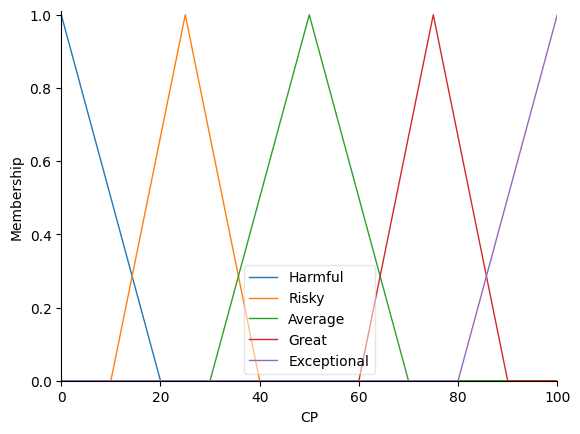

In [380]:
# Create fuzzy variables - inputs and outputs

# Antecedents - CP, AC, AU, EC

# Inputs - evaluation factors

# Evaluation factors are abbreviated as follows: compliance = CP, access control = AC, auditability = AU, 
# and encryption = EC

# Output - security (SC)

universe = np.arange(0, 101, 5) # universe of discourse

names = ['Harmful', 'Risky', 'Average', 'Great', 'Exceptional'] # names to show in the output fuzzy variables

CP = ctrl.Antecedent(universe, 'CP') # define the antecedent (CP)

# Define the membership function manually for each linguistic variable 
CP['Harmful'] = fuzz.membership.trimf(universe, [0,0,20])
CP['Risky'] = fuzz.membership.trimf(universe, [10,25,40])
CP['Average'] = fuzz.membership.trimf(universe, [30,50,70])
CP['Great'] = fuzz.membership.trimf(universe, [60,75,90])
CP['Exceptional'] = fuzz.membership.trimf(universe, [80,100,100])

CP.view()

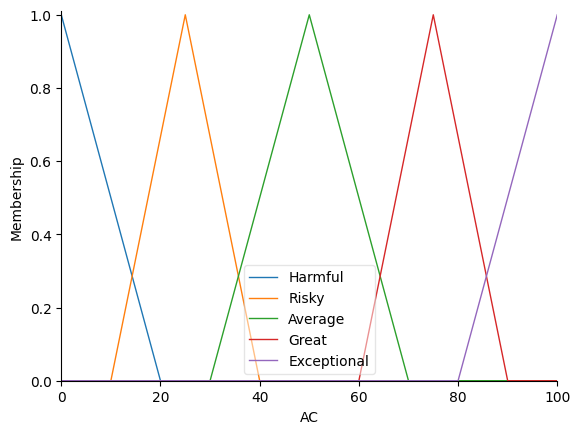

In [381]:
AC = ctrl.Antecedent(universe, 'AC') # define the antecedent (AC)

# Define the membership function manually for each linguistic variable 
AC['Harmful'] = fuzz.membership.trimf(universe, [0,0,20])
AC['Risky'] = fuzz.membership.trimf(universe, [10,25,40])
AC['Average'] = fuzz.membership.trimf(universe, [30,50,70])
AC['Great'] = fuzz.membership.trimf(universe, [60,75,90])
AC['Exceptional'] = fuzz.membership.trimf(universe, [80,100,100])

AC.view()

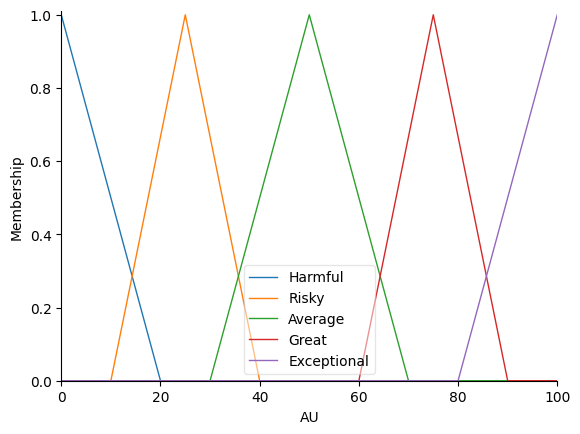

In [382]:
AU = ctrl.Antecedent(universe, 'AU') # define the antecedent (AU)

# Define the membership function manually for each linguistic variable 
AU['Harmful'] = fuzz.membership.trimf(universe, [0,0,20])
AU['Risky'] = fuzz.membership.trimf(universe, [10,25,40])
AU['Average'] = fuzz.membership.trimf(universe, [30,50,70])
AU['Great'] = fuzz.membership.trimf(universe, [60,75,90])
AU['Exceptional'] = fuzz.membership.trimf(universe, [80,100,100])

AU.view()

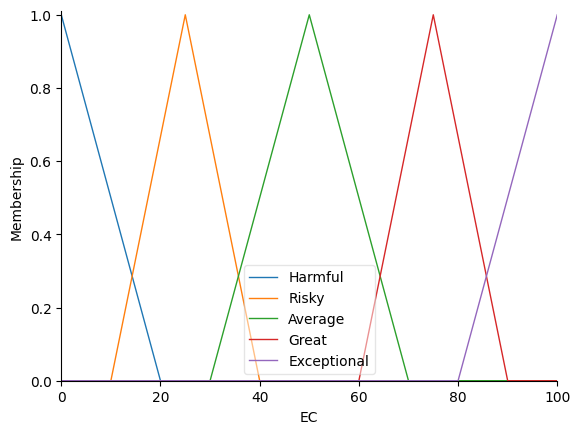

In [383]:
EC = ctrl.Antecedent(universe, 'EC') # define the antecedent (EC)

# Define the membership function manually for each linguistic variable 
EC['Harmful'] = fuzz.membership.trimf(universe, [0,0,20])
EC['Risky'] = fuzz.membership.trimf(universe, [10,25,40])
EC['Average'] = fuzz.membership.trimf(universe, [30,50,70])
EC['Great'] = fuzz.membership.trimf(universe, [60,75,90])
EC['Exceptional'] = fuzz.membership.trimf(universe, [80,100,100])

EC.view()

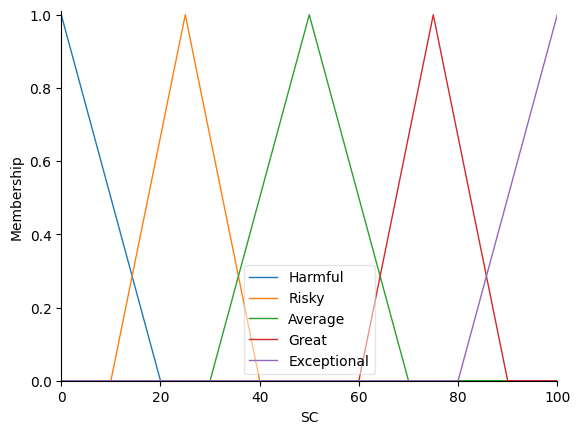

In [384]:
SC = ctrl.Consequent(universe, 'SC', defuzzify_method = 'centroid') # output

# Define the membership function manually for each linguistic variable 
SC['Harmful'] = fuzz.membership.trimf(universe, [0,0,20])
SC['Risky'] = fuzz.membership.trimf(universe, [10,25,40])
SC['Average'] = fuzz.membership.trimf(universe, [30,50,70])
SC['Great'] = fuzz.membership.trimf(universe, [60,75,90])
SC['Exceptional'] = fuzz.membership.trimf(universe, [80,100,100])

SC.view()

**Note:** The membership degree from a certain value (values in the table of fuzzy set classification) is obtained through these graphs.

#### Create the fuzzy rules

In the original paper we have about nineteen rules, for this case and  these inputs we are going to use only **two** **rules**.

In [385]:
rule1 = ctrl.Rule(CP['Harmful'] & AC['Risky'] & AU['Harmful'] & EC['Great'], SC['Risky'])
rule2 = ctrl.Rule(CP['Risky'] & AC['Average'] & AU['Harmful'] & EC['Great'], SC['Average'])

Now, we are applying these rules with the input crisp values:
 - CP = 15
 - AC = 35
 - AU = 10
 - EC = 75

In [386]:
problem_ctrl = ctrl.ControlSystem([rule1, rule2]) # collect the rules
problem = ctrl.ControlSystemSimulation(problem_ctrl) # calculate results from a ControlSystem

# Define problem's variables input
problem.input['CP'] = 15
problem.input['AC'] = 35
problem.input['AU'] = 10
problem.input['EC'] = 75

# Compute the fuzzy system
problem.compute()

39.69569288389513


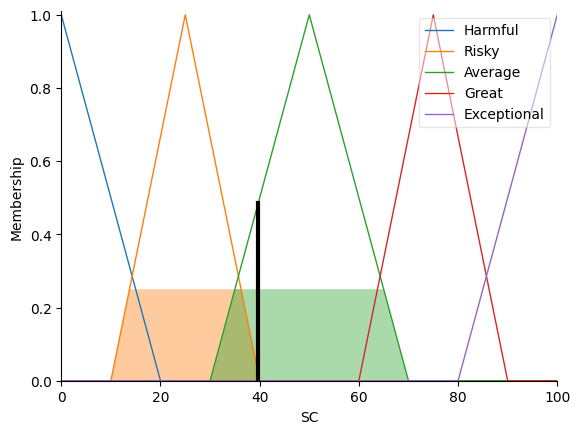

In [387]:
print(problem.output['SC'])
SC.view(sim = problem)

### First Technique with different inputs

In [388]:
# Define the rules
rule1 = ctrl.Rule(CP['Exceptional'] & AC['Exceptional'] & AU['Great'] & EC['Great'], SC['Great'])
rule2 = ctrl.Rule(CP['Exceptional'] & AC['Great'] & AU['Great'] & EC['Great'], SC['Great'])

In [389]:
problem_ctrl = ctrl.ControlSystem([rule1, rule2]) # collect the rules
problem = ctrl.ControlSystemSimulation(problem_ctrl) # calculate results from a ControlSystem

# Define problem's variables input
problem.input['CP'] = 91
problem.input['AC'] = 82
problem.input['AU'] = 73
problem.input['EC'] = 75

# Compute the fuzzy system
problem.compute()

74.99999999999999


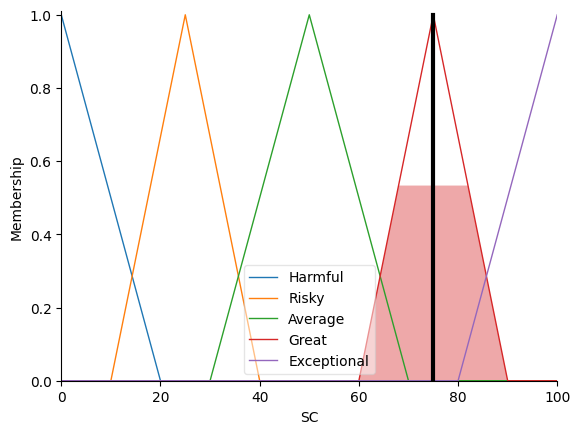

In [390]:
print(problem.output['SC'])
SC.view(sim = problem)

Defuzzification using the centroid method, since this method is the most suitable to the problem.

### Second Technique with paper inputs

Generate fuzzy membership functions for each antecedent.

In [391]:
# CP
CP_harmful = fuzz.trimf(universe, [0,0,20])
CP_risky = fuzz.trimf(universe, [10,25,40])
CP_average = fuzz.trimf(universe, [30,50,70])
CP_great = fuzz.trimf(universe, [60,75,90])
CP_exceptional = fuzz.trimf(universe, [80,100,100])

# AC 
AC_harmful = fuzz.trimf(universe, [0,0,20])
AC_risky = fuzz.trimf(universe, [10,25,40])
AC_average = fuzz.trimf(universe, [30,50,70])
AC_great = fuzz.trimf(universe, [60,75,90])
AC_exceptional = fuzz.trimf(universe, [80,100,100])

# AU
AU_harmful = fuzz.trimf(universe, [0,0,20])
AU_risky = fuzz.trimf(universe, [10,25,40])
AU_average = fuzz.trimf(universe, [30,50,70])
AU_great = fuzz.trimf(universe, [60,75,90])
AU_exceptional = fuzz.trimf(universe, [80,100,100])

# EC
EC_harmful = fuzz.trimf(universe, [0,0,20])
EC_risky = fuzz.trimf(universe, [10,25,40])
EC_average = fuzz.trimf(universe, [30,50,70])
EC_great = fuzz.trimf(universe, [60,75,90])
EC_exceptional = fuzz.trimf(universe, [80,100,100])

# SC - consequent
SC_harmful = fuzz.trimf(universe, [0,0,20])
SC_risky = fuzz.trimf(universe, [10,25,40])
SC_average = fuzz.trimf(universe, [30,50,70])
SC_great = fuzz.trimf(universe, [60,75,90])
SC_exceptional = fuzz.trimf(universe, [80,100,100])

Visualization of these membership functions:

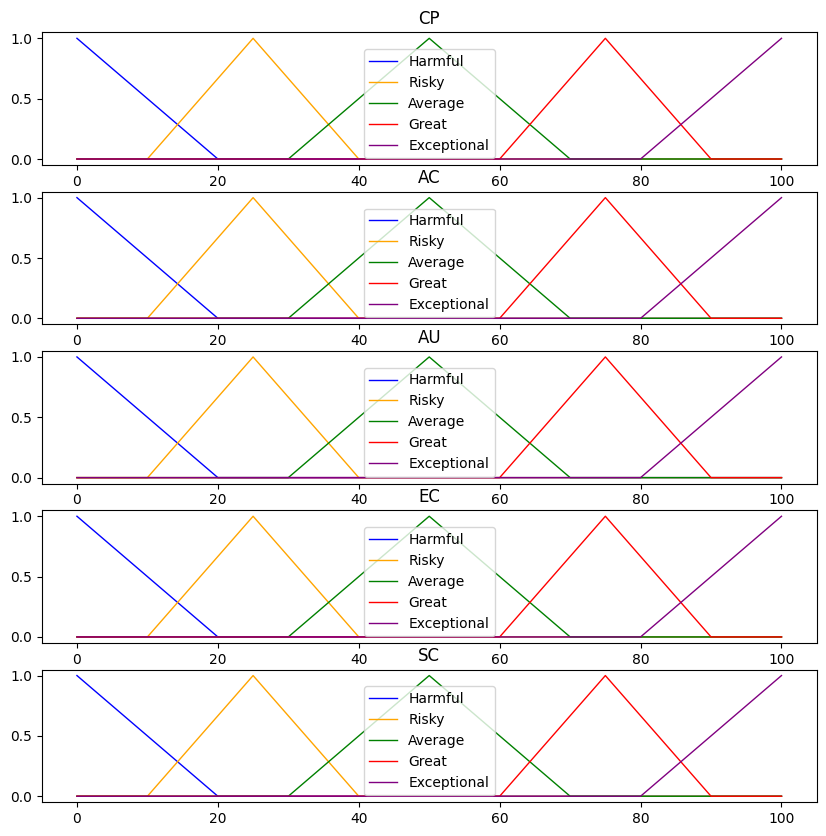

In [392]:
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(nrows = 5, figsize = (10,10))

# CP
ax0.plot(universe, CP_harmful, 'blue', linewidth = 1, label = 'Harmful')
ax0.plot(universe, CP_risky, 'orange', linewidth = 1, label = 'Risky')
ax0.plot(universe, CP_average, 'green', linewidth = 1, label = 'Average')
ax0.plot(universe, CP_great, 'red', linewidth = 1, label = 'Great')
ax0.plot(universe, CP_exceptional, 'purple', linewidth = 1, label = 'Exceptional')
ax0.set_title('CP')
ax0.legend()

# AC
ax1.plot(universe, AC_harmful, 'blue', linewidth = 1,  label = 'Harmful')
ax1.plot(universe, AC_risky, 'orange', linewidth = 1, label = 'Risky')
ax1.plot(universe, AC_average, 'green', linewidth = 1, label = 'Average')
ax1.plot(universe, AC_great, 'red', linewidth = 1, label = 'Great')
ax1.plot(universe, AC_exceptional, 'purple', linewidth = 1, label = 'Exceptional')
ax1.set_title('AC')
ax1.legend()

# AU
ax2.plot(universe, AU_harmful, 'blue', linewidth = 1,  label = 'Harmful')
ax2.plot(universe, AU_risky, 'orange', linewidth = 1, label = 'Risky')
ax2.plot(universe, AU_average, 'green', linewidth = 1, label = 'Average')
ax2.plot(universe, AU_great, 'red', linewidth = 1, label = 'Great')
ax2.plot(universe, AU_exceptional, 'purple', linewidth = 1, label = 'Exceptional')
ax2.set_title('AU')
ax2.legend()

#EC
ax3.plot(universe, EC_harmful, 'blue', linewidth = 1,  label = 'Harmful')
ax3.plot(universe, EC_risky, 'orange', linewidth = 1, label = 'Risky')
ax3.plot(universe, EC_average, 'green', linewidth = 1, label = 'Average')
ax3.plot(universe, EC_great, 'red', linewidth = 1, label = 'Great')
ax3.plot(universe, EC_exceptional, 'purple', linewidth = 1, label = 'Exceptional')
ax3.set_title('EC')
ax3.legend()

# SC - consequent
ax4.plot(universe, SC_harmful, 'blue', linewidth = 1,  label = 'Harmful')
ax4.plot(universe, SC_risky, 'orange', linewidth = 1, label = 'Risky')
ax4.plot(universe, SC_average, 'green', linewidth = 1, label = 'Average')
ax4.plot(universe, SC_great, 'red', linewidth = 1, label = 'Great')
ax4.plot(universe, SC_exceptional, 'purple', linewidth = 1, label = 'Exceptional')
ax4.set_title('SC')
ax4.legend()

Find the degree of membership u(xx) for a given value of x = xx:

In [393]:
CP_level_harmful = fuzz.interp_membership(universe, CP_harmful, 15)
CP_level_risky = fuzz.interp_membership(universe, CP_risky, 15)
CP_level_average = fuzz.interp_membership(universe, CP_average, 15)
CP_level_great = fuzz.interp_membership(universe, CP_great, 15)
CP_level_exceptional = fuzz.interp_membership(universe, CP_exceptional, 15)

AC_level_harmful = fuzz.interp_membership(universe, AC_harmful, 35)
AC_level_risky = fuzz.interp_membership(universe, AC_risky, 35)
AC_level_average = fuzz.interp_membership(universe, AC_average, 35)
AC_level_great = fuzz.interp_membership(universe, AC_great, 35)
AC_level_exceptional = fuzz.interp_membership(universe, AC_exceptional, 35)

AU_level_harmful = fuzz.interp_membership(universe, AU_harmful, 10)
AU_level_risky = fuzz.interp_membership(universe, AU_risky, 10)
AU_level_average = fuzz.interp_membership(universe, AU_average, 10)
AU_level_great = fuzz.interp_membership(universe, AU_great, 10)
AU_level_exceptional = fuzz.interp_membership(universe, AU_exceptional, 10)

EC_level_harmful = fuzz.interp_membership(universe, EC_harmful, 75)
EC_level_risky = fuzz.interp_membership(universe, EC_risky, 75)
EC_level_average = fuzz.interp_membership(universe, EC_average, 75)
EC_level_great = fuzz.interp_membership(universe, EC_great, 75)
EC_level_exceptional = fuzz.interp_membership(universe, EC_exceptional, 75)

Find the degree of membership u(xx) for a given value of x = xx:

In [394]:
CP_level_harmful, CP_level_risky, CP_level_average, CP_level_great, CP_level_exceptional 

(0.25, 0.3333333333333333, 0.0, 0.0, 0.0)

In [395]:
AC_level_harmful, AC_level_risky, AC_level_average, AC_level_great, AC_level_exceptional 

(0.0, 0.3333333333333333, 0.25, 0.0, 0.0)

In [396]:
AU_level_harmful, AU_level_risky, AU_level_average, AU_level_great, AU_level_exceptional 

(0.5, 0.0, 0.0, 0.0, 0.0)

In [397]:
EC_level_harmful, EC_level_risky, EC_level_average, EC_level_great, EC_level_exceptional 

(0.0, 0.0, 0.0, 1.0, 0.0)

Inference rules:

In [398]:
rule1 = np.fmin(CP_level_harmful, np.fmin(AC_level_risky, np.fmin(AU_level_harmful, EC_level_great)))
rule2 = np.fmin(CP_level_risky, np.fmin(AC_level_average, np.fmin(AU_level_harmful, EC_level_great)))

active_rule1 = np.fmin(rule1, SC_risky) 
active_rule2 = np.fmin(rule2, SC_average)
# SC_risky, SC_average are arrays with the values corresponding to the membership degree for each universe's value (0, 5, 10, 15, etc.)

security0 = np.zeros_like(universe)

#Rule strengths 
print('Rule1 strength: ', rule1)
print('Rule2 strength: ', rule2)

Rule1 strength:  0.25
Rule2 strength:  0.25


Rule aggregation:

In [399]:
rules_aggregated = np.fmax(active_rule1, active_rule2)

Defuzzification:

In [400]:
# Centroid Method
security = fuzz.defuzz(universe, rules_aggregated, 'centroid')
active_security = fuzz.interp_membership(universe, rules_aggregated, security)

In [401]:
# Bisctor Method
security2 = fuzz.defuzz(universe, rules_aggregated, 'bisector')
active_security2 = fuzz.interp_membership(universe, rules_aggregated, security2)

In [402]:
# Mean of Maximum
security3 = fuzz.defuzz(universe, rules_aggregated, 'mom')
active_security3 = fuzz.interp_membership(universe, rules_aggregated, security3)

In [403]:
# Min of Maximum
security4 = fuzz.defuzz(universe, rules_aggregated, 'som')
active_security4 = fuzz.interp_membership(universe, rules_aggregated, security4)

In [404]:
# Max of Maximum
security5 = fuzz.defuzz(universe, rules_aggregated, 'lom')
active_security5 = fuzz.interp_membership(universe, rules_aggregated, security5)

40.0


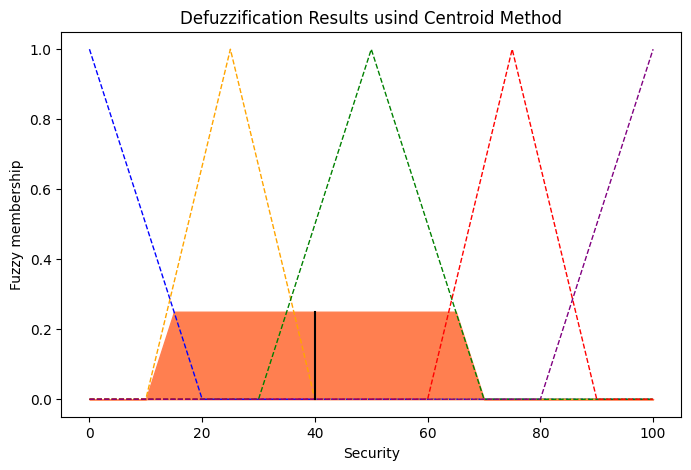

In [405]:
# Visualize with centroid method

fig, ax0 = plt.subplots(figsize = (8, 5))

ax0.plot(universe, SC_harmful, 'blue', linewidth = 1,  linestyle = '--')
ax0.plot(universe, SC_risky, 'orange', linewidth = 1, linestyle = '--')
ax0.plot(universe, SC_average, 'green', linewidth = 1, linestyle = '--')
ax0.plot(universe, SC_great, 'red', linewidth = 1, linestyle = '--')
ax0.plot(universe, SC_exceptional, 'purple', linewidth = 1, linestyle = '--')
ax0.fill_between(universe, security0, rules_aggregated, color = 'coral')
ax0.plot([security, security], [0, active_security], 'black', linewidth = 1.5)
ax0.set_title('Defuzzification Results usind Centroid Method')
plt.ylabel('Fuzzy membership')
plt.xlabel('Security')
print(security)

40.0


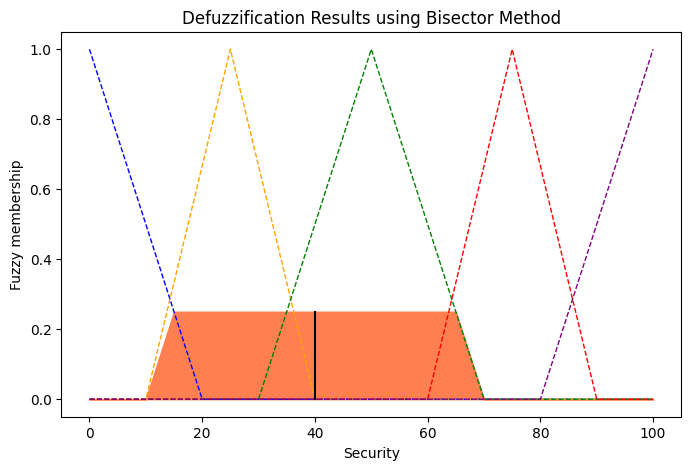

In [406]:
# Visualize with bisector method

fig, ax0 = plt.subplots(figsize = (8, 5))

ax0.plot(universe, SC_harmful, 'blue', linewidth = 1,  linestyle = '--')
ax0.plot(universe, SC_risky, 'orange', linewidth = 1, linestyle = '--')
ax0.plot(universe, SC_average, 'green', linewidth = 1, linestyle = '--')
ax0.plot(universe, SC_great, 'red', linewidth = 1, linestyle = '--')
ax0.plot(universe, SC_exceptional, 'purple', linewidth = 1, linestyle = '--')
ax0.fill_between(universe, security0, rules_aggregated, color = 'coral')
ax0.plot([security2, security2], [0, active_security2], 'black', linewidth = 1.5)
ax0.set_title('Defuzzification Results using Bisector Method')
plt.ylabel('Fuzzy membership')
plt.xlabel('Security')
print(security2)

40.0


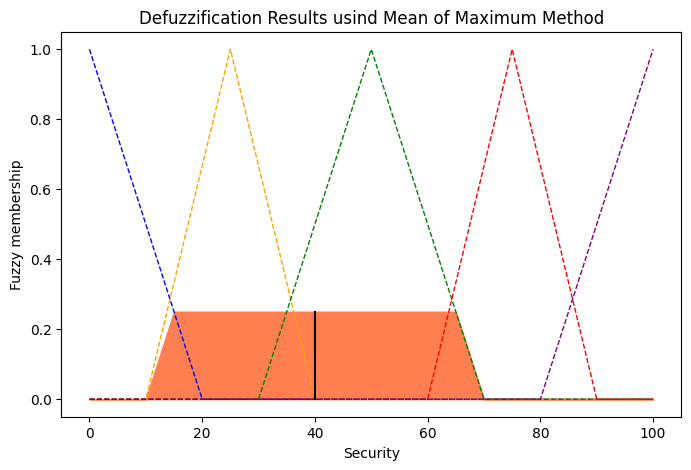

In [407]:
# Visualize with mean of maximum method

fig, ax0 = plt.subplots(figsize = (8, 5))

ax0.plot(universe, SC_harmful, 'blue', linewidth = 1,  linestyle = '--')
ax0.plot(universe, SC_risky, 'orange', linewidth = 1, linestyle = '--')
ax0.plot(universe, SC_average, 'green', linewidth = 1, linestyle = '--')
ax0.plot(universe, SC_great, 'red', linewidth = 1, linestyle = '--')
ax0.plot(universe, SC_exceptional, 'purple', linewidth = 1, linestyle = '--')
ax0.fill_between(universe, security0, rules_aggregated, color = 'coral')
ax0.plot([security3, security3], [0, active_security3], 'black', linewidth = 1.5)
ax0.set_title('Defuzzification Results usind Mean of Maximum Method')
plt.ylabel('Fuzzy membership')
plt.xlabel('Security')
print(security3)

15


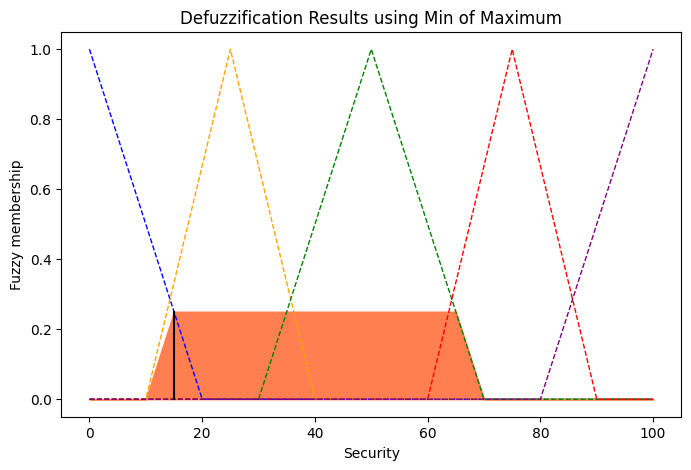

In [408]:
# Visualize with min of maximum

fig, ax0 = plt.subplots(figsize = (8, 5))

ax0.plot(universe, SC_harmful, 'blue', linewidth = 1,  linestyle = '--')
ax0.plot(universe, SC_risky, 'orange', linewidth = 1, linestyle = '--')
ax0.plot(universe, SC_average, 'green', linewidth = 1, linestyle = '--')
ax0.plot(universe, SC_great, 'red', linewidth = 1, linestyle = '--')
ax0.plot(universe, SC_exceptional, 'purple', linewidth = 1, linestyle = '--')
ax0.fill_between(universe, security0, rules_aggregated, color = 'coral')
ax0.plot([security4, security4], [0, active_security4], 'black', linewidth = 1.5)
ax0.set_title('Defuzzification Results using Min of Maximum')
plt.ylabel('Fuzzy membership')
plt.xlabel('Security')
print(security4)

# We will not add this one to the report since it is not the most adequate method to apply in this case. We leave it here just so
# that we can see the differences in the results visually 

65


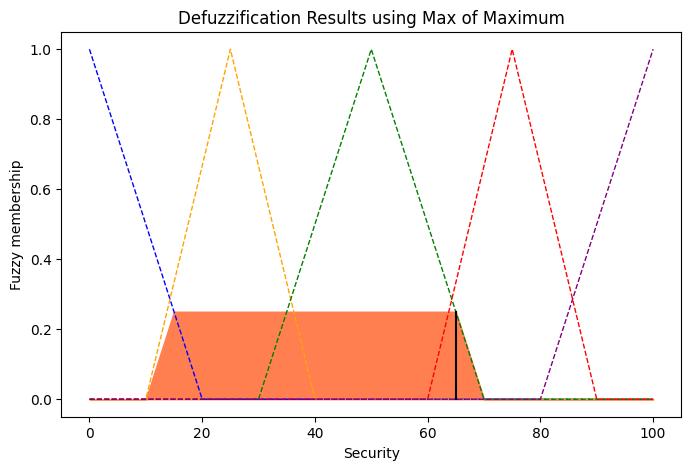

In [409]:
# Visualize with max of maximum
fig, ax0 = plt.subplots(figsize = (8, 5))

ax0.plot(universe, SC_harmful, 'blue', linewidth = 1,  linestyle = '--')
ax0.plot(universe, SC_risky, 'orange', linewidth = 1, linestyle = '--')
ax0.plot(universe, SC_average, 'green', linewidth = 1, linestyle = '--')
ax0.plot(universe, SC_great, 'red', linewidth = 1, linestyle = '--')
ax0.plot(universe, SC_exceptional, 'purple', linewidth = 1, linestyle = '--')
ax0.fill_between(universe, security0, rules_aggregated, color = 'coral')
ax0.plot([security5, security5], [0, active_security5], 'black', linewidth = 1.5)
ax0.set_title('Defuzzification Results using Max of Maximum')
plt.ylabel('Fuzzy membership')
plt.xlabel('Security')
print(security5)


# We will not add this one to the report since it is not the most adequate method to apply in this case. We leave it here just so
# that we can see the differences in the results visually 

### Second Technique with paper inputs and Lukasiewicz operators

Inference rules using **Łukasiewicz's operators**:

In [410]:
rule1_luka = np.fmax(0,np.fmax(0, np.fmax(0,CP_level_harmful + AC_level_risky -1) + AU_level_harmful -1) + EC_level_great -1)
rule2_luka = np.fmax(0,np.fmax(0, np.fmax(0,CP_level_risky + AC_level_average -1) + AU_level_harmful -1) + EC_level_great -1)

active_rule1_luka = np.fmax(0, rule1_luka + SC_risky -1) 
active_rule2_luka = np.fmax(0, rule2_luka + SC_average -1)
# SC_risky, SC_average are arrays with the values corresponding to the membership degree for each universe's value (0, 5, 10, 15, etc.)

security0 = np.zeros_like(universe)

#Rule strengths 
print('Rule1_luka strength: ', rule1_luka)
print('Rule2_luka strength: ', rule2_luka)

Rule1_luka strength:  0.0
Rule2_luka strength:  0.0


Rule aggregation:

In [411]:
# Luka operators
rules_aggregated_luka = np.fmax(active_rule1_luka, active_rule2_luka)

Defuzzification:

In [412]:
# Luka operators
#security_luka = fuzz.defuzz(universe, rules_aggregated_luka, 'centroid')
#active_security_luka = fuzz.interp_membership(universe, rules_aggregated_luka, security_luka)

# The rules strength are zero, so we will have no area in defuziification for Luka operators

### Second Technique with paper inputs and Godel operators

Inference rules using **Gödel's operators**:

In [413]:
rule1_godel= CP_level_harmful * AC_level_risky * AU_level_harmful * EC_level_great
rule2_godel = CP_level_risky * AC_level_average * AU_level_harmful * EC_level_great

active_rule1_godel = rule1_godel * SC_risky
active_rule2_godel = rule2_godel * SC_average
# SC_risky, SC_average are arrays with the values corresponding to the membership degree for each universe's value (0, 5, 10, 15, etc.)

security0 = np.zeros_like(universe)

#Rule strengths 
print('Rule1_godel strength: ', rule1_godel)
print('Rule2_godel strength: ', rule2_godel)

Rule1_godel strength:  0.041666666666666664
Rule2_godel strength:  0.041666666666666664


Rule aggregation:

In [414]:
# Godel operators
rules_aggregated_godel = np.fmax(active_rule1_godel, active_rule2_godel)

Defuzzification:

In [415]:
# Godel Operators
security_godel = fuzz.defuzz(universe, rules_aggregated_godel, 'centroid')
active_security_godel = fuzz.interp_membership(universe, rules_aggregated_godel, security_godel)

39.44444444444444


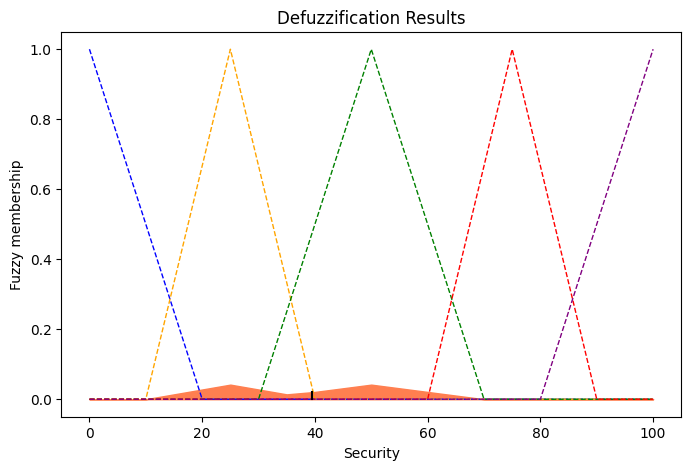

In [416]:
# Visualize for Godel Operators

fig, ax0 = plt.subplots(figsize = (8, 5))

ax0.plot(universe, SC_harmful, 'blue', linewidth = 1,  linestyle = '--')
ax0.plot(universe, SC_risky, 'orange', linewidth = 1, linestyle = '--')
ax0.plot(universe, SC_average, 'green', linewidth = 1, linestyle = '--')
ax0.plot(universe, SC_great, 'red', linewidth = 1, linestyle = '--')
ax0.plot(universe, SC_exceptional, 'purple', linewidth = 1, linestyle = '--')
ax0.fill_between(universe, security0, rules_aggregated_godel, color = 'coral')
ax0.plot([security_godel, security_godel], [0, active_security_godel], 'black', linewidth = 1.5)
ax0.set_title('Defuzzification Results')
plt.ylabel('Fuzzy membership')
plt.xlabel('Security')
print(security_godel)

# Second Technique with different inputs

Generate fuzzy membership functions for each antecedent.

In [417]:
# CP
CP_harmful = fuzz.trimf(universe, [0,0,20])
CP_risky = fuzz.trimf(universe, [10,25,40])
CP_average = fuzz.trimf(universe, [30,50,70])
CP_great = fuzz.trimf(universe, [60,75,90])
CP_exceptional = fuzz.trimf(universe, [80,100,100])

# AC 
AC_harmful = fuzz.trimf(universe, [0,0,20])
AC_risky = fuzz.trimf(universe, [10,25,40])
AC_average = fuzz.trimf(universe, [30,50,70])
AC_great = fuzz.trimf(universe, [60,75,90])
AC_exceptional = fuzz.trimf(universe, [80,100,100])

# AU
AU_harmful = fuzz.trimf(universe, [0,0,20])
AU_risky = fuzz.trimf(universe, [10,25,40])
AU_average = fuzz.trimf(universe, [30,50,70])
AU_great = fuzz.trimf(universe, [60,75,90])
AU_exceptional = fuzz.trimf(universe, [80,100,100])

# EC
EC_harmful = fuzz.trimf(universe, [0,0,20])
EC_risky = fuzz.trimf(universe, [10,25,40])
EC_average = fuzz.trimf(universe, [30,50,70])
EC_great = fuzz.trimf(universe, [60,75,90])
EC_exceptional = fuzz.trimf(universe, [80,100,100])

# SC - consequent
SC_harmful = fuzz.trimf(universe, [0,0,20])
SC_risky = fuzz.trimf(universe, [10,25,40])
SC_average = fuzz.trimf(universe, [30,50,70])
SC_great = fuzz.trimf(universe, [60,75,90])
SC_exceptional = fuzz.trimf(universe, [80,100,100])

Visualization of these membership functions:

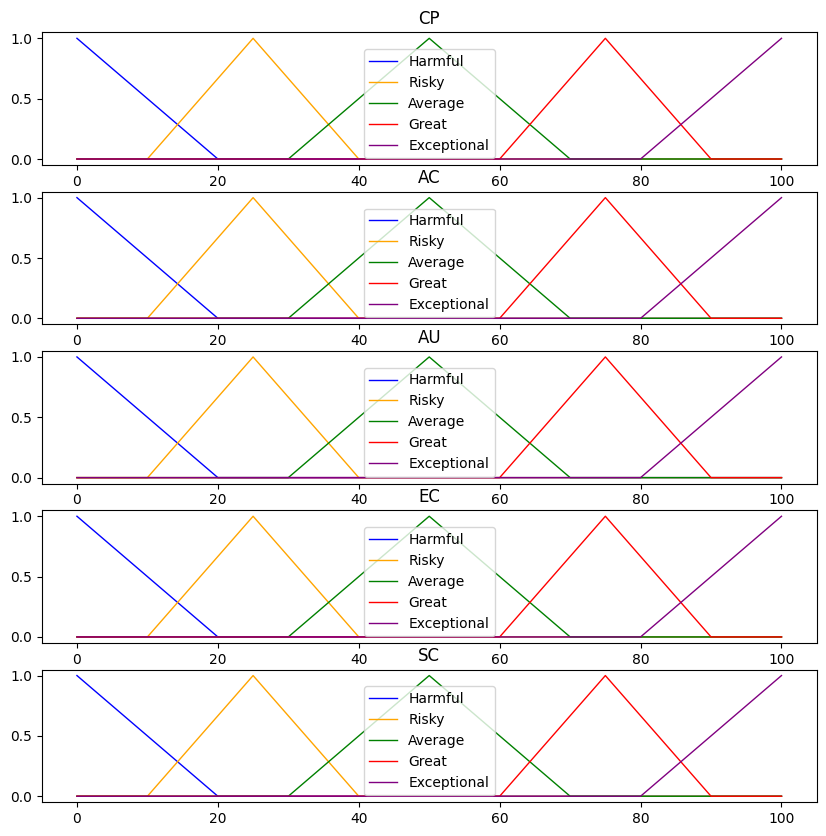

In [418]:
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(nrows = 5, figsize = (10,10))

# CP
ax0.plot(universe, CP_harmful, 'blue', linewidth = 1, label = 'Harmful')
ax0.plot(universe, CP_risky, 'orange', linewidth = 1, label = 'Risky')
ax0.plot(universe, CP_average, 'green', linewidth = 1, label = 'Average')
ax0.plot(universe, CP_great, 'red', linewidth = 1, label = 'Great')
ax0.plot(universe, CP_exceptional, 'purple', linewidth = 1, label = 'Exceptional')
ax0.set_title('CP')
ax0.legend()

# AC
ax1.plot(universe, AC_harmful, 'blue', linewidth = 1,  label = 'Harmful')
ax1.plot(universe, AC_risky, 'orange', linewidth = 1, label = 'Risky')
ax1.plot(universe, AC_average, 'green', linewidth = 1, label = 'Average')
ax1.plot(universe, AC_great, 'red', linewidth = 1, label = 'Great')
ax1.plot(universe, AC_exceptional, 'purple', linewidth = 1, label = 'Exceptional')
ax1.set_title('AC')
ax1.legend()

# AU
ax2.plot(universe, AU_harmful, 'blue', linewidth = 1,  label = 'Harmful')
ax2.plot(universe, AU_risky, 'orange', linewidth = 1, label = 'Risky')
ax2.plot(universe, AU_average, 'green', linewidth = 1, label = 'Average')
ax2.plot(universe, AU_great, 'red', linewidth = 1, label = 'Great')
ax2.plot(universe, AU_exceptional, 'purple', linewidth = 1, label = 'Exceptional')
ax2.set_title('AU')
ax2.legend()

#EC
ax3.plot(universe, EC_harmful, 'blue', linewidth = 1,  label = 'Harmful')
ax3.plot(universe, EC_risky, 'orange', linewidth = 1, label = 'Risky')
ax3.plot(universe, EC_average, 'green', linewidth = 1, label = 'Average')
ax3.plot(universe, EC_great, 'red', linewidth = 1, label = 'Great')
ax3.plot(universe, EC_exceptional, 'purple', linewidth = 1, label = 'Exceptional')
ax3.set_title('EC')
ax3.legend()

# SC - consequent
ax4.plot(universe, SC_harmful, 'blue', linewidth = 1,  label = 'Harmful')
ax4.plot(universe, SC_risky, 'orange', linewidth = 1, label = 'Risky')
ax4.plot(universe, SC_average, 'green', linewidth = 1, label = 'Average')
ax4.plot(universe, SC_great, 'red', linewidth = 1, label = 'Great')
ax4.plot(universe, SC_exceptional, 'purple', linewidth = 1, label = 'Exceptional')
ax4.set_title('SC')
ax4.legend()

Find the degree of membership u(xx) for a given value of x = xx:

In [419]:
CP_level_harmful = fuzz.interp_membership(universe, CP_harmful, 91)
CP_level_risky = fuzz.interp_membership(universe, CP_risky, 91)
CP_level_average = fuzz.interp_membership(universe, CP_average, 91)
CP_level_great = fuzz.interp_membership(universe, CP_great, 91)
CP_level_exceptional = fuzz.interp_membership(universe, CP_exceptional, 91)

AC_level_harmful = fuzz.interp_membership(universe, AC_harmful, 82)
AC_level_risky = fuzz.interp_membership(universe, AC_risky, 82)
AC_level_average = fuzz.interp_membership(universe, AC_average, 82)
AC_level_great = fuzz.interp_membership(universe, AC_great, 82)
AC_level_exceptional = fuzz.interp_membership(universe, AC_exceptional,82)

AU_level_harmful = fuzz.interp_membership(universe, AU_harmful, 73)
AU_level_risky = fuzz.interp_membership(universe, AU_risky, 73)
AU_level_average = fuzz.interp_membership(universe, AU_average, 73)
AU_level_great = fuzz.interp_membership(universe, AU_great, 73)
AU_level_exceptional = fuzz.interp_membership(universe, AU_exceptional, 73)

EC_level_harmful = fuzz.interp_membership(universe, EC_harmful, 75)
EC_level_risky = fuzz.interp_membership(universe, EC_risky, 75)
EC_level_average = fuzz.interp_membership(universe, EC_average, 75)
EC_level_great = fuzz.interp_membership(universe, EC_great, 75)
EC_level_exceptional = fuzz.interp_membership(universe, EC_exceptional, 75)

Find the degree of membership u(xx) for a given value of x = xx:

In [420]:
CP_level_harmful, CP_level_risky, CP_level_average, CP_level_great, CP_level_exceptional 

(0.0, 0.0, 0.0, 0.0, 0.55)

In [421]:
AC_level_harmful, AC_level_risky, AC_level_average, AC_level_great, AC_level_exceptional 

(0.0, 0.0, 0.0, 0.5333333333333333, 0.1)

In [422]:
AU_level_harmful, AU_level_risky, AU_level_average, AU_level_great, AU_level_exceptional 

(0.0, 0.0, 0.0, 0.8666666666666667, 0.0)

In [423]:
EC_level_harmful, EC_level_risky, EC_level_average, EC_level_great, EC_level_exceptional 

(0.0, 0.0, 0.0, 1.0, 0.0)

Inference rules:

In [424]:
rule1 = np.fmin(CP_level_exceptional, np.fmin(AC_level_exceptional, np.fmin(AU_level_great, EC_level_great)))
rule2 = np.fmin(CP_level_exceptional, np.fmin(AC_level_great, np.fmin(AU_level_great, EC_level_great)))


active_rule1 = np.fmin(rule1, SC_great) 
active_rule2 = np.fmin(rule2, SC_great)
# SC_risky, SC_average are arrays with the values corresponding to the membership degree for each universe's value (0, 5, 10, 15, etc.)

security0 = np.zeros_like(universe)

#Rule strengths 
print('Rule1 strength: ', rule1)
print('Rule2 strength: ', rule2)

Rule1 strength:  0.1
Rule2 strength:  0.5333333333333333


Rule aggregation:

In [425]:
rules_aggregated = np.fmax(active_rule1, active_rule2)

Defuzzification:

In [426]:
# Centroid Method
security = fuzz.defuzz(universe, rules_aggregated, 'centroid')
active_security = fuzz.interp_membership(universe, rules_aggregated, security)

75.0


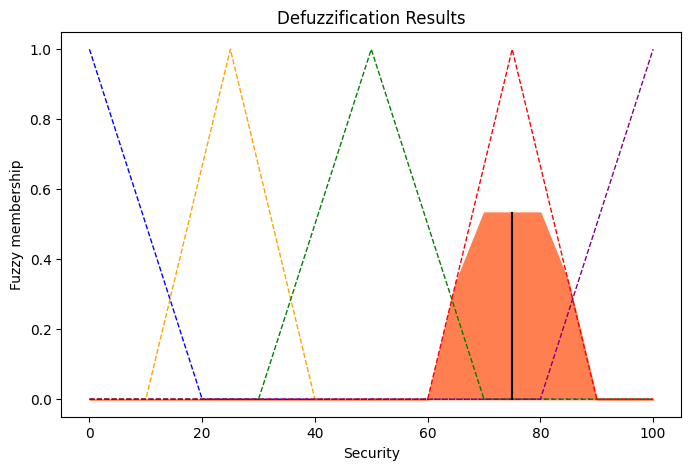

In [427]:
# Visualize with centroid method

fig, ax0 = plt.subplots(figsize = (8, 5))

ax0.plot(universe, SC_harmful, 'blue', linewidth = 1,  linestyle = '--')
ax0.plot(universe, SC_risky, 'orange', linewidth = 1, linestyle = '--')
ax0.plot(universe, SC_average, 'green', linewidth = 1, linestyle = '--')
ax0.plot(universe, SC_great, 'red', linewidth = 1, linestyle = '--')
ax0.plot(universe, SC_exceptional, 'purple', linewidth = 1, linestyle = '--')
ax0.fill_between(universe, security0, rules_aggregated, color = 'coral')
ax0.plot([security, security], [0, active_security], 'black', linewidth = 1.5)
ax0.set_title('Defuzzification Results')
plt.ylabel('Fuzzy membership')
plt.xlabel('Security')
print(security)

## References for code

 https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html  
 https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem.html
